# <span style="color:orange"> Analysis of windspeeds in Ireland, and the potential,
impacts on the windfarm industry.<span>
*By Laura Lyons*
***

This project was submitted as part of the module Programming for Data Analytics 24-25: 4369., Higher Diploma in Science, Data Analytics


## <span style="color:orange"> Table of contents<span>
***
1. [Introduction](#10-introduction)
2. [Method](#2-methods)\
   2.1. [Prerequisites/ Imports](#21-prerequisites-imports)\
   2.2. [Load the Data](#23-load-the-data)
3. [Results](#30-results)\
   3.1 [Data Overiew](#32-data-clean-up)\
   3.2 [Data Clean-up](#32-data-clean-up)\
   3.3 [Data Analysis](#33-data-analysis)\
   3.4 [Data Correlation](#34-data-correlation)\
   3.5 [Regression Analysis](#35-regression-analysis)
4. [Discussion and Conclusion](#4-discussion-and-conclusions)
5. [References](#references)

## <span style="color:orange"> **1.    Introduction**<span>
***
Wind-generated energy is becoming increasingly important in Ireland for several key reasons:

1. **Renewable Energy Targets and Climate Action**: Ireland is committed to reducing its carbon emissions and increasing the share of renewable energy in its electricity generation. Wind energy plays a central role in achieving these climate targets. As a clean, renewable resource, wind energy helps to cut down on greenhouse gas emissions and reduces Ireland's reliance on fossil fuels. The Irish government has committed to producing 80% of the country’s electricity from renewable sources by 2030, with wind energy at the forefront. [(Government of Ireland, Climate Action Plan, 2023)](https://www.gov.ie/en/publication/7bd8c-climate-action-plan-2023/).

2. **EU Support and Policy Alignment**: As part of its commitments to the European Union’s Green Deal and energy transition, Ireland is receiving EU funding and policy support to invest in renewable energy infrastructure. Wind energy is a key element of this strategy, as it helps the EU meet its collective climate goals and ensure a transition to a low-carbon economy.The EU's clean energy goals include major investments in wind energy, and Ireland is a key player in achieving these targets. [(European Commission, Sustainable finance)](https://ec.europa.eu/info/business-economy-euro/banking-and-finance/sustainable-finance_en).

3. **Energy Security**: Wind energy helps improve Ireland’s energy security by reducing its dependency on imported fossil fuels. Diversifying our energy supply enhances energy security by reducing both demand for imported fossil fuels and also exposure to price variations.[(SEAI: Energy Security in Ireland, 2020)](https://www.seai.ie/sites/default/files/publications/Energy-Security-in-Ireland-2020-.pdf).

4. **Abundant Wind Resources**: Ireland's geographic location offers significant potential to harness wind energy,Ireland benefits from strong, consistent winds, particularly along its coastal areas. This makes it an ideal location for  wind farms.  with offshore wind especially promising due to stronger and more reliable winds at sea.

In summary, wind energy is becoming increasingly vital in Ireland due to its environmental benefits, abundant natural resources, potential for economic growth, and alignment with both national and EU energy goals.

## <span style="color:orange"> **2.    Methods** <span>
***

The approach used to anayise the data set for this project, involved analysing the data by generating a data overview, 'cleaning-up'the data, analysing the data, including any significant correlations and/or regressions. 

#### <span style="color:orange">2.1    Prerequisites/ Imports <span>

A number of imports were used to help with the data analysis and visualisation.

1. **sys**: This [module](https://docs.python.org/3/library/sys.html) provides access to some variables used or maintained by the interpreter and to functions that interact strongly with the interpreter.
1. **Pandas**: was used for the DataFrame structure and for storing, manipulating and working with structured data. It allows us to investigate CSV files, amongst other features.
1. **NumPy**: as it creates efficient data structures for dealing with numerical data in python. Reference Lecture 5. Module Principles of Data Analytics.
1. **Matplotlib.pyplot:** for creating plots.
1. **Seaborn**: matplotlib sub-library for creating attractive data visualisation.
1. **datetime**: supplies classes for [manipulating dates and times](https://docs.python.org/3/library/datetime.html).
1. **[Cartopy](https://anaconda.org/anaconda/cartopy#:~:text=Cartopy%20is%20a%20Python%20package%20designed%20for%20geospatial,to%20produce%20maps%20and%20other%20geospatial%20data%20analyses.)** is a Python package designed for geospatial data processing in order to produce maps and other geospatial data analyses.

In [2]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

***
#### <span style="color:orange"> 2.3   Load the Data<span>
The wind data set was loaded from [Met Eireanns' historical data](https://www.met.ie/climate/available-data/historical-data). 

Three weather stations from Cork were choosen for the analysis (Figure 2.1).
1. Roches Point, a coastal weather stations located on the south coast of Cork.
2. Sherkin Island, a weather stations located on an island, off West Cork.
3. Cork Airport, located inland, close to Cork City. 

(Originally I had choosen Moore Park weather station, located in the midlands of North Cork, however ater inital analysis, I noticed that this weather station only started collecting data in 2023, which would limit comparission between weather stations and also the reliability of predictive statistics).

Once the data was loaded, it allowed the analysis/investigation of the data to begin. It was necessary to remove the first 17/23 rows of the files, as these rows did not contain data of interest to this analysis.

Figure 2.1: The locations of the weather stations analyised in this study.


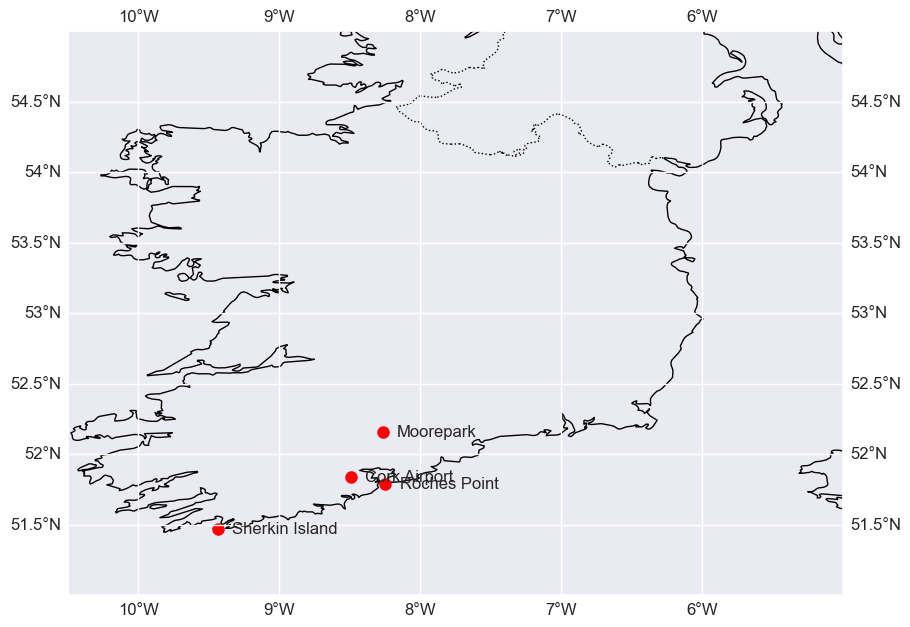

In [13]:
# Create a figure and an axis with a specific projection
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Add coastlines and borders
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')

# Add markers for the weather stations
weather_stations = {
    'Roches Point': (51.789, -8.247),
    'Sherkin Island': (51.466, -9.433),
    'Cork Airport': (51.841, -8.491),
    'Moorepark': (52.160, -8.267)
}

for station, (lat, lon) in weather_stations.items():
    ax.plot(lon, lat, marker='o', color='red', markersize=8, transform=ccrs.PlateCarree())
    ax.text(lon + 0.1, lat, station, transform=ccrs.PlateCarree(), fontsize=12, verticalalignment='center')

# Set the extent of the map
ax.set_extent([-10.5, -5, 51, 55], crs=ccrs.PlateCarree())

# Add gridlines
ax.gridlines(draw_labels=True)

# Show the map
print ('Figure 2.1: The locations of the weather stations analyised in this study.')
plt.savefig('images/weather_stations_map.png')
plt.show()

In [4]:
# Import the data and merge the dataframes (assisted by ChatGpT, to merge  along the 'date' column)
import pandas as pd

# Read the first CSV file and add a new column to indicate the source file
dfrp = pd.read_csv('data/roches_pt.csv', header=0, skiprows=17, low_memory=False)
dfrp['source'] = 'roches_pt'

# Read the second CSV file and add a new column to indicate the source file
dfs = pd.read_csv('data/sherkin.csv', header=0, skiprows=17, low_memory=False)
dfs['source'] = 'sherkin'

# Read the third CSV file and add a new column to indicate the source file
dfca = pd.read_csv('data/cork_airport.csv', header=0, skiprows=23, low_memory=False)
dfca['source'] = 'cork_airport'

## <span style="color:orange"> **3. Results** <span>
***

#### <span style="color:orange">  3.1    Data Overview <span>

An overview of the data was complete, so that we could decifer the type and number of variables present. 

From Table 3.1, we can see that there are 7 variables for each of the weather statiions,
1. Date (Formatt day, month, year, hour, minute)
1. Rain (mm)
1. Temperature (<sup>0</sup>C)
1. Vapour Pressure (hPa)
1. Relative Humidity (%)
1. Mean Wind Speed (kt)
1. Predominant Wind Direction (deg)

,the majority of which were orginially of variable type, object (Table 3.2). All necessary data columns were converted to integers, to help with the analysis of the data (Table 3.3).

<span style="color:orange"> Missing Data. <span>

Handling missing data is important, as some machine learning algorithms do not support data with missing values [(Bankar, 2023)](https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a). The most commen method used to deal with missing values is imputation, which can be defined as:<div align="center">"*A process to assign or substitute the missing row/ column value with the dedired/calculated value*" [(Chauhan, 2023)](https://towardsai.net/p/machine-learning/in-depth-handling-imputation-techniques-of-missing-values-in-feature-transformation)</div >

Imputation techniques include:
1. Statistic: where a statistical value is calculated for each column (*i.e.* the mean), and this is then used to replace the missing values within that column.
1. Mean: where an educated guess is used to produced a number to replace the missing values within each column.
1. Mode: This is where the mean values of the entire column in question is used to replace the missing values.
1. Uni-variate: The missing data is replaced by the mean/median/random value (Bankar, 2023).

For this analysis, we are going to replace the missing values with '0', because on this occassion there will be a lot of emphasis put on temporal and space trends within these datasets.


In [5]:
# Print the head of each DataFrame
print ('Table 3.1: The first two rows of each of the three weather station dataframes')
print("\nRoches point weather station")
print(dfrp.head(2))
print("\nSherkin weather station")
print(dfs.head(2))
print("\nCork Airport weather station")
print(dfca.head(2))

Table 3.1: The first two rows of each of the three weather station dataframes

Roches point weather station
               date rain  temp vappr rhum wdsp wddir     source
0  01/12/1955 01:00    0  10.7  11.8   91   16   170  roches_pt
1  01/12/1955 02:00  2.9   9.8    12   99   11   190  roches_pt

Sherkin weather station
               date rain  temp vappr rhum wdsp wddir   source
0  01/05/2004 00:00       10.9  10.2   77             sherkin
1  01/05/2004 01:00    0  10.8  10.1   78   14   350  sherkin

Cork Airport weather station
               date rain  temp vappr rhum  wdsp  wddir        source
0  01/01/1962 01:00       -1.1   5.3   94    14    340  cork_airport
1  01/01/1962 02:00       -1.1   5.3   94    10    340  cork_airport


In [6]:
# Get the data types of each DataFrame
dfrp_dtypes = dfrp.dtypes.rename('Roches Point')
dfs_dtypes = dfs.dtypes.rename('Sherkin Island')
dfca_dtypes = dfca.dtypes.rename('Cork Airport')

# Concatenate the data types into a single DataFrame
dtypes_combined = pd.concat([dfrp_dtypes, dfs_dtypes, dfca_dtypes], axis=1)

# Rename the columns
dtypes_combined.columns = ['Roches Point', 'Sherkin Island', 'Cork Airport']

# Print the combined data types
print('Table 3.2: The data types present at each weather station\n')
print(dtypes_combined)

Table 3.2: The data types present at each weather station

       Roches Point Sherkin Island Cork Airport
date         object         object       object
rain         object         object       object
temp         object         object      float64
vappr        object         object       object
rhum         object         object       object
wdsp         object         object        int64
wddir        object         object        int64
source       object         object       object


In [7]:
# Convert columns from strings to floats
# Roches Point weather station
dfrp['rain'] = pd.to_numeric(dfrp['rain'], errors='coerce')
dfrp['temp'] = pd.to_numeric(dfrp['temp'], errors='coerce')
dfrp['vappr'] = pd.to_numeric(dfrp['vappr'], errors='coerce')
dfrp['rhum'] = pd.to_numeric(dfrp['rhum'], errors='coerce')
dfrp['wdsp'] = pd.to_numeric(dfrp['wdsp'], errors='coerce')
dfrp['wddir'] = pd.to_numeric(dfrp['wddir'], errors='coerce')

# Sherkin Islandweather station
dfs['rain'] = pd.to_numeric(dfs['rain'], errors='coerce')
dfs['temp'] = pd.to_numeric(dfs['temp'], errors='coerce')
dfs['vappr'] = pd.to_numeric(dfs['vappr'], errors='coerce')
dfs['rhum'] = pd.to_numeric(dfs['rhum'], errors='coerce')
dfs['wdsp'] = pd.to_numeric(dfs['wdsp'], errors='coerce')
dfs['wddir'] = pd.to_numeric(dfs['wddir'], errors='coerce')

# Cork Airport weather station
dfca['rain'] = pd.to_numeric(dfca['rain'], errors='coerce')
dfca['temp'] = pd.to_numeric(dfca['temp'], errors='coerce')
dfca['vappr'] = pd.to_numeric(dfca['vappr'], errors='coerce')
dfca['rhum'] = pd.to_numeric(dfca['rhum'], errors='coerce')
dfca['wdsp'] = pd.to_numeric(dfca['wdsp'], errors='coerce')
dfca['wddir'] = pd.to_numeric(dfca['wddir'], errors='coerce')

# Get the data types of each DataFrame
dfrp_dtypes = dfrp.dtypes.rename('Roches Point')
dfs_dtypes = dfs.dtypes.rename('Sherkin Island')
dfca_dtypes = dfca.dtypes.rename('Cork Airport')

# Concatenate the data types into a single DataFrame
dtypes_combined = pd.concat([dfrp_dtypes, dfs_dtypes, dfca_dtypes], axis=1)

# Rename the columns
dtypes_combined.columns = ['Roches Point', 'Sherkin Island', 'Cork Airport']

# Print the combined data types
print('Table 3.3: The data types present at each weather station after conversion to numeric\n')
print(dtypes_combined)

Table 3.3: The data types present at each weather station after conversion to numeric

       Roches Point Sherkin Island Cork Airport
date         object         object       object
rain        float64        float64      float64
temp        float64        float64      float64
vappr       float64        float64      float64
rhum        float64        float64      float64
wdsp        float64        float64        int64
wddir       float64        float64        int64
source       object         object       object


In [8]:
# Let deal with empty and missing values.

# Roches Point weather station
# Replace empth cells with '0'
dfrp.fillna(0, inplace=True)
dfs.fillna(0, inplace=True)
dfca.fillna(0, inplace=True)   

***
#### <span style="color:orange"> 3.2    Data Clean-up <span>

Many statistical tests rely on the assumption that data is distributed according to a normal or Gaussian curve, and if the data is not normal these tools won't work [(Had2Know, 2024)](https://www.had2know.org/academics/test-for-normality-statistics.html)

Several methods can be used to check if the data is normally distributed:
1. **Visual grphical analysis** (Histograms, Q-Q plot,) (Figure: 3.1)
1. **Statistical Test** (Shapiro-Wilk Test, Kolmogorov- Smirnov Test). If the p-value is greater than 0.05, the data is considered to be normally distributed.

I will use a combination of these techniques across all variables to assess data normality.

<span style="color:orange"> Histograms. <span>

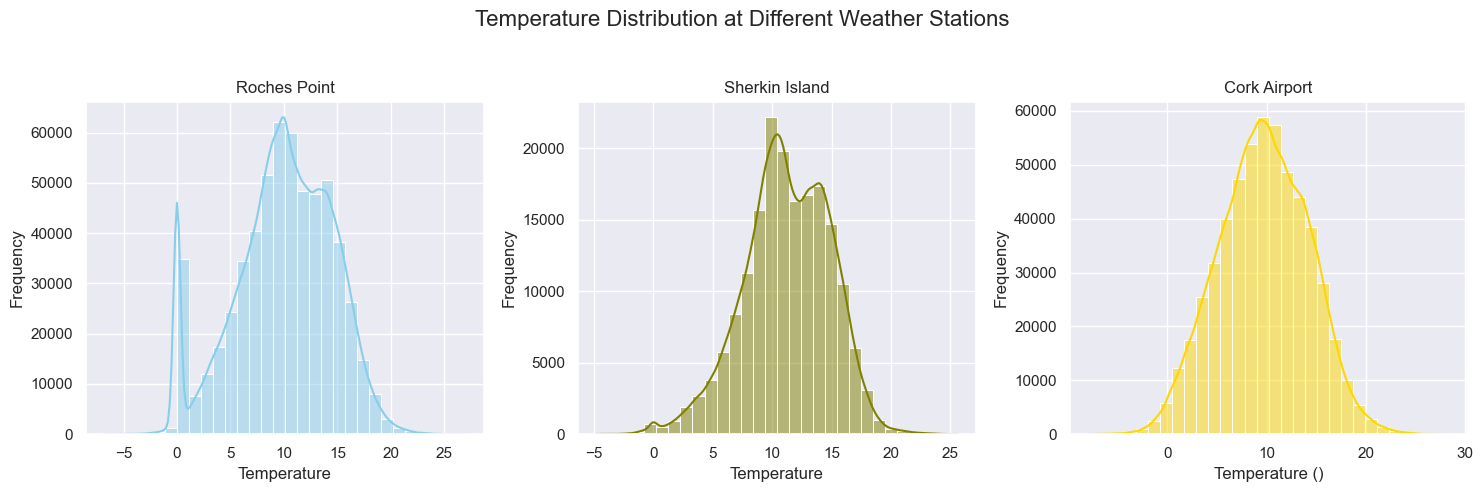

In [ ]:
# Histograms of the data
# Temperature (0C)
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=dfrp, x="temp", kde=True, color="skyblue", bins=30, ax=axs[0])
axs[0].set_title('Roches Point')
axs[0].set_xlabel('Temperature')
axs[0].set_ylabel('Frequency')

sns.histplot(data=dfs, x="temp", kde=True, color="olive", bins=30, ax=axs[1])
axs[1].set_title('Sherkin Island')
axs[1].set_xlabel('Temperature')
axs[1].set_ylabel('Frequency')

sns.histplot(data=dfca, x="temp", kde=True, color="gold", bins=30, ax=axs[2])
axs[2].set_title('Cork Airport')
axs[2].set_xlabel('Temperature ()')
axs[2].set_ylabel('Frequency')

# Add an overall title to the figure
fig.suptitle('Figure 3.1: Temperature Distribution at Different Weather Stations', fontsize=16, fontweight='bold', color= 'orange')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

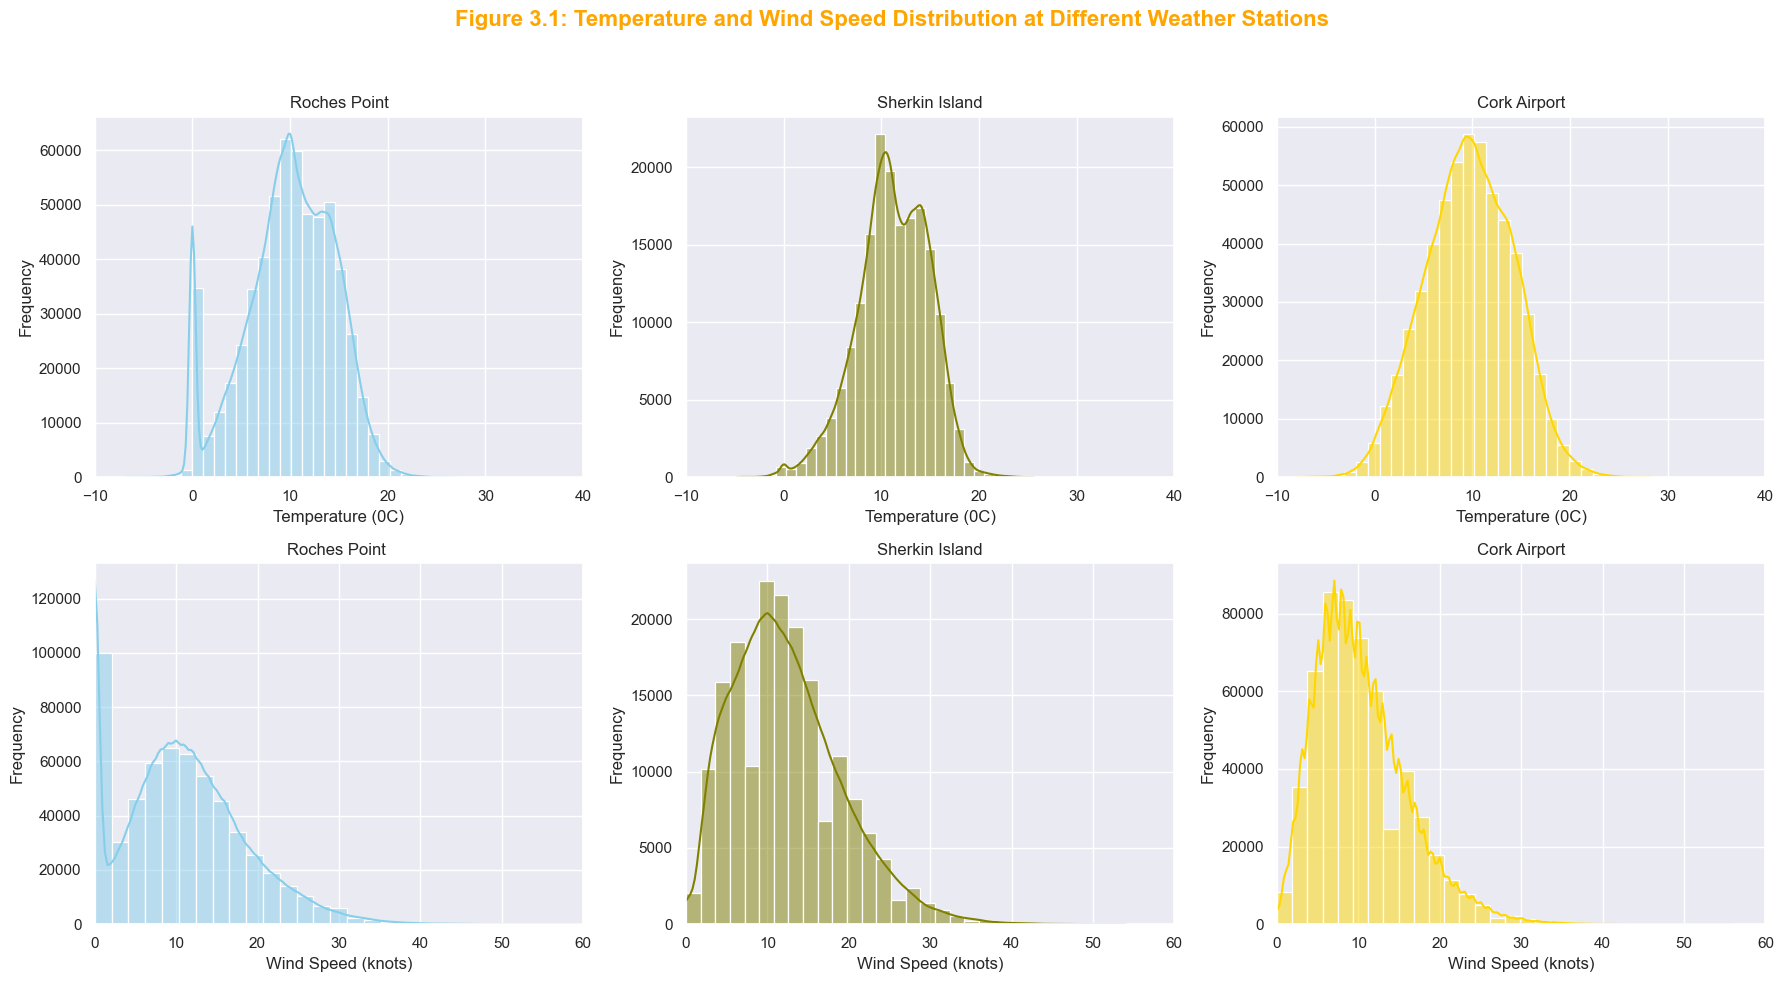

In [14]:
# plotting histograms to assess data normality.
import seaborn as sns
import matplotlib.pyplot as plt

# Set the theme for the plots
sns.set_theme(style="darkgrid")
fig, axs = plt.subplots(2, 3, figsize=(18, 10))

# Plot histograms for temperature
sns.histplot(data=dfrp, x="temp", kde=True, color="skyblue", bins=30, ax=axs[0, 0])
axs[0, 0].set_title('Roches Point')
axs[0, 0].set_xlabel('Temperature (0C)')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_xlim(-10, 40)

sns.histplot(data=dfs, x="temp", kde=True, color="olive", bins=30, ax=axs[0, 1])
axs[0, 1].set_title('Sherkin Island')
axs[0, 1].set_xlabel('Temperature (0C)')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_xlim(-10, 40)

sns.histplot(data=dfca, x="temp", kde=True, color="gold", bins=30, ax=axs[0, 2])
axs[0, 2].set_title('Cork Airport')
axs[0, 2].set_xlabel('Temperature (0C)')
axs[0, 2].set_ylabel('Frequency')
axs[0, 2].set_xlim(-10, 40)

# Plot histograms for wind speed
sns.histplot(data=dfrp, x="wdsp", kde=True, color="skyblue", bins=30, ax=axs[1, 0])
axs[1, 0].set_title('Roches Point ')
axs[1, 0].set_xlabel('Wind Speed (knots)')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_xlim(0, 60)

sns.histplot(data=dfs, x="wdsp", kde=True, color="olive", bins=30, ax=axs[1, 1])
axs[1, 1].set_title('Sherkin Island')
axs[1, 1].set_xlabel('Wind Speed (knots)')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_xlim(0, 60)

sns.histplot(data=dfca, x="wdsp", kde=True, color="gold", bins=30, ax=axs[1, 2])
axs[1, 2].set_title('Cork Airport')
axs[1, 2].set_xlabel('Wind Speed (knots)')
axs[1, 2].set_ylabel('Frequency')
axs[1, 2].set_xlim(0, 60)


# Add an overall title to the figure
fig.suptitle('Figure 3.1: Temperature and Wind Speed Distribution at Different Weather Stations', fontsize=16, fontweight='bold', color= 'orange')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

In [ ]:
# Create Q-Q plotsto assess data normallity.
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the theme for the plots
sns.set_theme(style="darkgrid")

# Create subplots
fig, axs = plt.subplots(2, 3, figsize=(15, 5))

# Plot Q-Q plots with labels
# Temperature
stats.probplot(dfrp['temp'], dist="norm", plot=axs[0])
axs[0].set_title('Roches Point')
axs[0].set_xlabel('Theoretical Quantiles')
axs[0].set_ylabel('Sample Quantiles')

stats.probplot(dfs['temp'], dist="norm", plot=axs[1])
axs[1].set_title('Sherkin Island')
axs[1].set_xlabel('Theoretical Quantiles')
axs[1].set_ylabel('Sample Quantiles')

stats.probplot(dfca['temp'], dist="norm", plot=axs[2])
axs[2].set_title('Cork Airport')
axs[2].set_xlabel('Theoretical Quantiles')
axs[2].set_ylabel('Sample Quantiles')

# Add an overall title to the figure
fig.suptitle('Q-Q Plots for Temperature Distribution at Different Weather Stations', fontsize=16, fontweight='bold', color= 'orange')

# Show the plot
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to perform Kolmogorov-Smirnov test and plot results
def ks_test_and_plot(df, column):
    ks_stat, ks_p = stats.kstest(df[column], 'norm', args=(np.mean(df[column]), np.std(df[column])))
    print(f'{column} - Kolmogorov-Smirnov Test: Statistic={ks_stat}, p-value={ks_p}')
    
    # Plot empirical CDF and theoretical CDF
    ecdf = np.sort(df[column])
    cdf = np.linspace(0, 1, len(ecdf))
    
    plt.figure(figsize=(10, 6))
    plt.step(ecdf, cdf, label='Empirical CDF')
    plt.plot(ecdf, stats.norm.cdf(ecdf, np.mean(df[column]), np.std(df[column])), label='Theoretical CDF', linestyle='--')
    plt.title(f'Empirical CDF vs Theoretical CDF for {column}')
    plt.xlabel('Value')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.show()

# Apply the function to each column in each DataFrame
for column in dfrp.columns:
    ks_test_and_plot(dfrp, column)
    ks_test_and_plot(dfs, column)
    ks_test_and_plot(dfca, column)


In [ ]:
# Sharpio-Wilk test
from scipy.stats import shapiro

# Shapiro-Wilk test
# Roches Point
# Temperature
stat, p = shapiro(dfrp['temp'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

# 


Statistics=nan, p=nan
Sample does not look Gaussian (reject H0)


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats

# Function to perform Shapiro-Wilk test and plot results
def shapiro_test_and_plot(df, column):
    stat, p_value = stats.shapiro(df[column])
    print(f'{column} - Statistic: {stat}, p-value: {p_value}')
    
    # Plot histogram
    plt.figure(figsize=(10, 6))
    plt.hist(df[column], bins=20, edgecolor='k', alpha=0.7)
    plt.title(f'Histogram of {column}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()
    
    # Q-Q plot
    plt.figure(figsize=(10, 6))
    stats.probplot(df[column], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {column}')
    plt.show()

# Apply the function to each column
for column in dfrp.columns:
    shapiro_test_and_plot(dfrp, column)


ValueError: could not convert string to float: '01/12/1955 01:00'

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Generate some data
data = np.random.normal(loc=0, scale=1, size=100)

# Perform the Shapiro-Wilk test
stat, p_value = stats.shapiro(data)

# Print the results
print(f'Statistic: {stat}, p-value: {p_value}')

# Plot the data
plt.figure(figsize=(10, 6))
plt.hist(data, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
plt.figure(figsize=(10, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro
import matplotlib.pyplot as plt
import seaborn as sns

# Function to run Shapiro-Wilk Test on specified columns
def run_shapiro_test(df, columns):
    results = []
    for column in columns:
        stat, p = shapiro(df[column])
        results.append({'Variable': column, 'Statistics': stat, 'p-value': p})
    return results

# Specify the columns to run the test on
columns_to_test = ['rain', 'temp', 'rhum', 'vappr', 'wdsp', 'wddir']

# Run the Shapiro-Wilk Test on the specified columns for each DataFrame
shapiro_results_dfrp = run_shapiro_test(dfrp, columns_to_test)
shapiro_results_dfs = run_shapiro_test(dfs, columns_to_test)
shapiro_results_dfca = run_shapiro_test(dfca, columns_to_test)

# Combine results into a single DataFrame for plotting
results_df = pd.DataFrame(shapiro_results_dfrp + shapiro_results_dfs + shapiro_results_dfca)
results_df['Station'] = ['Roches Point'] * len(shapiro_results_dfrp) + ['Sherkin Island'] * len(shapiro_results_dfs) + ['Cork Airport'] * len(shapiro_results_dfca)

# Plot the Shapiro-Wilk Test statistics
plt.figure(figsize=(15, 7))
sns.barplot(x='Variable', y='Statistics', hue='Station', data=results_df)
plt.title('Shapiro-Wilk Test Statistics for Different Weather Stations')
plt.show()

# Plot the Shapiro-Wilk Test p-values
plt.figure(figsize=(15, 7))
sns.barplot(x='Variable', y='p-value', hue='Station', data=results_df)
plt.title('Shapiro-Wilk Test p-values for Different Weather Stations')
plt.show()


In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Function to run Shapiro-Wilk Test on specified columns
def run_shapiro_test(df, columns):
    results = {}
    for column in columns:
        stat, p = shapiro(df[column])
        results[column] = {'Statistics': stat, 'p-value': p}
    return results

# Specify the columns to run the test on
columns_to_test = ['rain', 'temp', 'rhum', 'vappr', 'wind_speed', 'wddir']

# Run the Shapiro-Wilk Test on the specified columns for each DataFrame
shapiro_results_dfrp = run_shapiro_test(dfrp, columns_to_test)
shapiro_results_dfs = run_shapiro_test(dfs, columns_to_test)
shapiro_results_dfca = run_shapiro_test(dfca, columns_to_test)

# Print the results for dfrp
print("Shapiro-Wilk Test Results for Roches Point:")
for column, result in shapiro_results_dfrp.items():
    print(f"  {column}: Statistics={result['Statistics']:.3f}, p-value={result['p-value']:.3f}")
    if result['p-value'] > 0.05:
        print("    Sample looks Gaussian (fail to reject H0)")
    else:
        print("    Sample does not look Gaussian (reject H0)")
    print()

# Print the results for dfs
print("Shapiro-Wilk Test Results for Sherkin Island:")
for column, result in shapiro_results_dfs.items():
    print(f"  {column}: Statistics={result['Statistics']:.3f}, p-value={result['p-value']:.3f}")
    if result['p-value'] > 0.05:
        print("    Sample looks Gaussian (fail to reject H0)")
    else:
        print("    Sample does not look Gaussian (reject H0)")
    print()

# Print the results for dfca
print("Shapiro-Wilk Test Results for Cork Airport:")
for column, result in shapiro_results_dfca.items():
    print(f"  {column}: Statistics={result['Statistics']:.3f}, p-value={result['p-value']:.3f}")
    if result['p-value'] > 0.05:
        print("    Sample looks Gaussian (fail to reject H0)")
    else:
        print("    Sample does not look Gaussian (reject H0)")
    print()


In [ ]:
import pandas as pd
from scipy.stats import shapiro

# Function to run Shapiro-Wilk Test on specified columns
def run_shapiro_test(df, columns):
    results = {}
    for column in columns:
        stat, p = shapiro(df[column])
        results[column] = {'Statistics': stat, 'p-value': p}
    return results

# Specify the columns to run the test on
columns_to_test = ['rain', 'temp', 'rhum', 'vappr', 'wdsp', 'wddir']

# Run the Shapiro-Wilk Test on the specified columns for each DataFrame
shapiro_results_dfrp = run_shapiro_test(dfrp, columns_to_test)
shapiro_results_dfs = run_shapiro_test(dfs, columns_to_test)
shapiro_results_dfca = run_shapiro_test(dfca, columns_to_test)

# Print the results in parallel
print("Shapiro-Wilk Test Results:")
print("{:<15} {:<15} {:<15} {:<15}".format("Variable", "Roches Point", "Sherkin Island", "Cork Airport"))
print("-" * 60)
for column in columns_to_test:
    rp_result = shapiro_results_dfrp[column]
    si_result = shapiro_results_dfs[column]
    ca_result = shapiro_results_dfca[column]
    print("{:<15} Statistics={:<8.3f} p-value={:<8.3f} Statistics={:<8.3f} p-value={:<8.3f} Statistics={:<8.3f} p-value={:<8.3f}".format(
        column,
        rp_result['Statistics'], rp_result['p-value'],
        si_result['Statistics'], si_result['p-value'],
        ca_result['Statistics'], ca_result['p-value']
    ))


c:\Users\Laura\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 551520.
  res = hypotest_fun_out(*samples, **kwds)


Shapiro-Wilk Test Results:
Variable        Roches Point    Sherkin Island  Cork Airport   
------------------------------------------------------------
rain            Statistics=nan      p-value=nan      Statistics=nan      p-value=nan      Statistics=nan      p-value=nan     
temp            Statistics=nan      p-value=nan      Statistics=nan      p-value=nan      Statistics=0.999    p-value=0.000   
rhum            Statistics=nan      p-value=nan      Statistics=nan      p-value=nan      Statistics=nan      p-value=nan     
vappr           Statistics=nan      p-value=nan      Statistics=nan      p-value=nan      Statistics=nan      p-value=nan     
wdsp            Statistics=nan      p-value=nan      Statistics=nan      p-value=nan      Statistics=0.951    p-value=0.000   
wddir           Statistics=nan      p-value=nan      Statistics=nan      p-value=nan      Statistics=0.959    p-value=0.000   


***
#### <span style="color:orange"> 3.3    Data Analysis <span>

<span style="color:orange"> Descriptive statistics. <span>

Descriptive statistics utilise both categorical and numerical (quantitative) variables. The categorical variables can be used to subdivde the numerical variables and can often help in defining trends and anomolies. For this analysis, descriptive analys was only complete on the numerical data. 

The summary statitics species for this analysis were:

- Count   
- Mean  
- Standard Deviation  
- Minimum 
- 25%   
- 50% 
- 75%   
- Maximum.

Summary statistics can be useful when generating plots, as it will aid in defining the maximum and minimum values

In [ ]:
# Roches Point weather station
dfrp_dropped = dfrp.drop(columns=['date','source'])
summary_dfrp= dfrp_dropped.describe().round(2) # round to 2 decimal places
print('Table 3.4: Summary statistics for Roches Point weather station' )
print(summary_dfrp)

# Sherkin Island weather station
dfs_dropped = dfs.drop(columns=['date','source'])
summary_dfs= dfs_dropped.describe().round(2)
print('\nTable 3.5: Summary statistics for Sherkin Island weather station' )
print(summary_dfs)

# Cork Airport weather station
dfca_dropped = dfca.drop(columns=['date','source'])
summary_dfca= dfca_dropped.describe().round(2)
print('\nTable 3.6: Summary statistics for Cork Airport weather station' )
print(summary_dfca)

Table 3.4: Summary statistics for Roches Point weather station
            rain       temp      vappr       rhum       wdsp      wddir
count  585221.00  566829.00  536008.00  536011.00  585218.00  584976.00
mean        0.10      10.27      10.97      84.33      10.74     188.34
std         0.47       4.31       3.22      11.29       7.61     112.70
min         0.00      -6.80       0.00       0.00       0.00       0.00
25%         0.00       7.50       8.50      78.00       5.00     100.00
50%         0.00      10.40      10.90      86.00      10.00     210.00
75%         0.00      13.50      13.20      93.00      15.00     290.00
max        24.50      27.00      23.90     100.00      62.00     360.00

Table 3.5: Summary statistics for Sherkin Island weather station
            rain       temp      vappr       rhum       wdsp      wddir
count  180076.00  180084.00  180025.00  180027.00  180076.00  180021.00
mean        0.13      11.25      11.60      84.21      12.36     198.03
std    

In [ ]:
import matplotlib.pyplot as plt
from windrose import WindroseAxes
import pandas as pd

def create_wind_rose(dfrp):
    # Read the data
    # Extract wind speed and direction
    wind_speed = dfrp['wdsp']
    wind_direction = dfrp['wddir']

    # Create a wind rose plot
    ax = WindroseAxes.from_ax()
    ax.bar(wind_direction, wind_speed, normed=True, opening=0.8, edgecolor='white')
    ax.set_legend()

    # Save the plot to a file
    plt.savefig('images/wind_rose.png')

    # Show the plot
    plt.show()



***
#### <span style="color:orange"> 3.4    Data Correlation <span>

Clarke (2021), defines [Pearson’s product moment correlation](https://practicaldatascience.co.uk/data-science/how-to-visualise-correlations-using-pandas-and-seaborn) as, “*a statistical method to measure the strength of the linear relationship between variables*”.

The model examines two variables, and returns an *r* value between -1 and 1, indicating the strength of their linear correlation. The closer the value is to 1, the higher the correlation. A positive *r* value indicates a positive relationship between the variables and a negative *r* value a negative relationship. An *r* value of 1 would indicate a perfect relationship between the analysed variables. We can assess variable correlation numerically using a table or visually using a heatmap. 

<div align="center">

| Correlation Co-efficient|Strength of Association  | 
|---------------          |--------------           |
| 0< *r* >0.39            | Weak                    |
| 0.4< *r* >0.59          | Moderate                |    
| 0.6< *r* >0.99          | Strong                  | 

Table 3.8; The classification of the strength of the correlation cooefficients for pairs variables.</div>

First, lets look at the dataset as a whole. Correlations can only be complete on quantitative variables, hence we wil look at:
- Bill length (mm).
- Bill depth (mm).
- Flipper length (mm).
- Body mass (g).

In [ ]:
# Merge the DataFrames on the date column
combined_df = pd.merge(dfrp, dfs, on='date', how='outer', suffixes=('_roches_pt', '_sherkin'))
combined_df = pd.merge(combined_df, dfca, on='date', how='outer', suffixes=('', '_cork_airport'))

# Rename the columns from the Moorepark file
for col in dfmp.columns:
    if col != 'date' and col != 'source':
        combined_df.rename(columns={col: f"{col}_moore_pk"}, inplace=True)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

print("The three CSV files have been combined and saved as 'combined_file.csv'")


In [ ]:
# Convert object columns to integers
for col in combined_df.columns:
    if combined_df[col].dtype == 'object':
        combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce').fillna(0).astype(int)

# Save the combined DataFrame to a new CSV file
combined_df.to_csv('combined_file.csv', index=False)

print("The object columns converted to integers, and saved as 'combined_file.csv'")

The object columns converted to integers, and saved as 'combined_file.csv'


$$Power (W) = 1/2  .  ρ  . A  .  v3$$

- Power = Watts
- ρ (rho, a Greek letter) = density of the air in kg/m<sup>3</sup>
- A = cross-sectional area of the wind in m<sup>2</sup>
- v = velocity of the wind in m/s

If:
- The standard density of air is 1.225 kg/m<sup>3</sup> [(Helmenstine, A., 2024)](https://www.thoughtco.com/density-of-air-at-stp-607546).
- The turbine has a 24 m diameter, which means the radius is 12 m. Thus, the swept area of the turbine is: (pi)r2 = 3.14159(122) = 452.4 m<sup>2</sup>

[(Dutton, D.A, 2024)](https://www.e-education.psu.edu/emsc297/node/649)

## <span style="color:orange"> **5. References** <span>
***

Bankar R (2023) Supervised Learning with Scikit-learn. (URL: https://medium.com/analytics-vidhya/supervised-learning-with-scikit-learn-df617631216a) Accessed: 08/12/2024.

Chauhan A (2023) In-depth Handling/Imputation Techniques of Missing Values in Feature Transformation. (URL: https://towardsai.net/p/machine-learning/in-depth-handling-imputation-techniques-of-missing-values-in-feature-transformation). Accessed: 08/12/2024.

Dutton D A (2024) Wind Energy and Power Calculations (URL: https://www.e-education.psu.edu/emsc297/node/649). Accessed: 07/12/2024.

 European Commission, Sustainable finance (URL: https://ec.europa.eu/info/business-economy-euro/banking-and-finance/sustainable-finance_en). Accessed: 07/12/2024.

Government of Ireland- Climate Action Plan (2023) (URL: https://www.gov.ie/en/publication/7bd8c-climate-action-plan-2023/). Accessed: 07/12/2024.

Helmenstine A (2024) What Is the Density of Air at STP? (URL: https://www.thoughtco.com/density-of-air-at-stp-607546). Accessed: 07/12/2024.

SEAI, Energy Security in Ireland (2020) (URL: https://www.seai.ie/sites/default/files/publications/Energy-Security-in-Ireland-2020-.pdf). Accessed: 07/12/2024.

***
### <span style="color:orange"> End